In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style()

In [3]:
df = pd.read_csv("../b/titanic_data.csv")

In [4]:
100*df.isna().sum()/df.shape[0]

Name         0.000000
Pclass       0.000000
Sex          0.000000
Age         20.091673
Sibsp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.076394
Cabin       77.463713
Embarked     0.000000
Survived     0.000000
dtype: float64

In [5]:
df.drop(["Cabin"],axis=1, inplace=True)

In [6]:
# Hay algun NaN boolean
df.isna()

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,True,False,False,False,False,False,False
1305,False,False,False,False,False,False,False,False,False,False
1306,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False


In [10]:
df[np.all(df.isna(),axis=1)==True]

,Name,Pclass,Sex,Age,Sibsp,Parch,Ticket,Fare,Embarked,Survived


In [10]:
np.any(np.all(df.isna(),axis=1))

False

In [14]:
df.shape

(1309, 10)

In [13]:
# Cardinalidad de las variables: % de valores únicos
100*df.nunique()/df.shape[0]

Name        99.847212
Pclass       0.229183
Sex          0.152788
Age          7.486631
Sibsp        0.534759
Parch        0.611154
Ticket      70.970206
Fare        21.466769
Embarked     0.229183
Survived     0.152788
dtype: float64

In [27]:
# Veamos quién no tiene un precio de billete
df[df.Fare.isna()].Fare = df.Fare[df.Pclass==3].value_counts().max()

C:\Users\aulafor\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
# df.variable.value_counts() devuelve la cuenta de cada valor único
# por defecto ordenados de mayor a menor
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [30]:
df.loc[df.Fare.isna(),'Fare']# = df.Fare[df.Pclass==3].value_counts().max()

Series([], Name: Fare, dtype: float64)

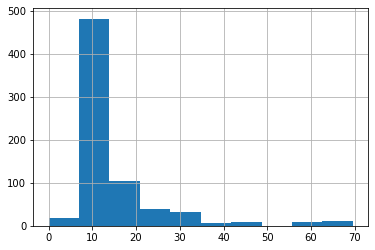

In [18]:
# El sexo y el puerto de embarque no afectan a la distribución
df[df.Pclass==3].Fare.hist()

In [26]:
df.Fare[df.Pclass==3].value_counts().max()

60

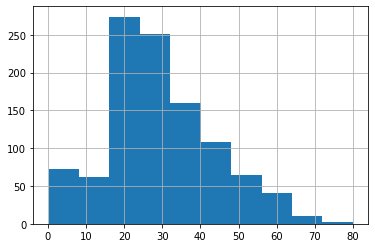

In [33]:
df.Age.value_counts()
df.Age.hist()

In [34]:
print(df.Age.min(),df.Age.max())

0.1667 80.0


In [36]:
# Usando np.where(condición, este valor si True, este valor si False)
# Así podemos asignar valores a nuestra tabla 
df['Infant'] = np.where(df.Age <= 10, 1, 0)
df['Young'] = np.where(df.Age > 10,1,0)*np.where(df.Age<=30,1,0)
df['Mature'] = np.where(df.Age > 30,1,0)*np.where(df.Age<=55,1,0)
df['Venerable'] = np.where(df.Age >55, 1, 0)

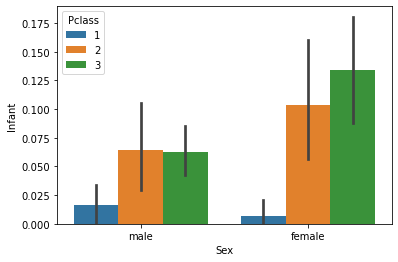

In [47]:
# Vamos a ver como se distribuyen las categorías de Edad según clase y 
sns.barplot(x='Sex',y='Infant', hue='Pclass', data=df)

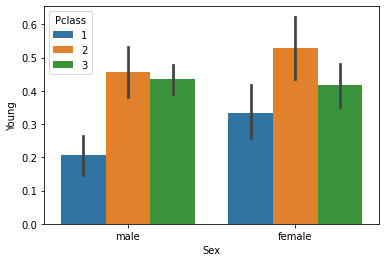

In [49]:
sns.barplot(x='Sex',y='Young', hue='Pclass', data=df)

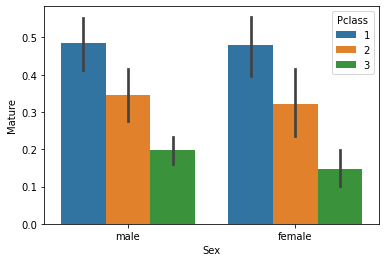

In [51]:
sns.barplot(x='Sex',y='Mature', hue='Pclass', data=df)

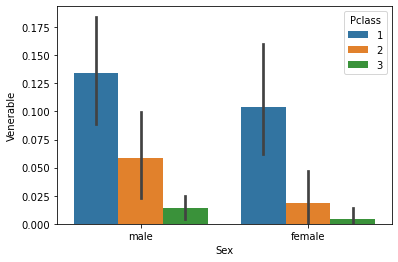

In [52]:
sns.barplot(x='Sex',y='Venerable', hue='Pclass', data=df)

In [53]:
# Veamos cuantos pasajeros sin Edad tenemos por Clase
df[df.Age.isna()].Pclass.value_counts()

3    208
1     39
2     16
Name: Pclass, dtype: int64

In [59]:
df[df.Pclass==1][['Infant','Young','Mature','Venerable']].sum()

Infant         4
Young         85
Mature       156
Venerable     39
dtype: int64

In [56]:
df[df.Pclass==2][['Infant','Young','Mature','Venerable']].sum(axis=0)

Infant        22
Young        134
Mature        93
Venerable     12
dtype: int64

In [58]:
df[df.Pclass==3][['Infant','Young','Mature','Venerable']].sum(axis=0)

Infant        60
Young        304
Mature       129
Venerable      8
dtype: int64

In [66]:
# Por terminar
# Normalizamos las probabilidades de grupo de edad por clase de billete
edad_categ = ['Infant','Young','Mature','Venerable']

probs_clas_1 = df[df.Pclass==1][edad_categ].sum().values


'Infant'

In [ ]:
# Por terminar

# Dado que la fluctuación por sexo es menor, podemos asignar una categoria
# de edad a cada faltante respetando la distribución de categorías por clase

imputacion_edad_clase_primera = np.random.choice(edad_categ,
    size = df[df.Age.isna().Pclass.value_counts()[1]],
p=df[df.Pclass==1][['Infant','Young','Mature','Venerable']].sum().values)

In [70]:
#Por terminar

indice_1a=0
indice_2a=0
indice_3a=0

for index, row in df[df.Pclass==1][df.Age.isna()].iterrows():
    if row.Pclass==1:
        df.loc[index,imputacion_edad_clase_primera[indice_1a]] = 1
    indice_1a+=1
    elif row.Pclass==2:
        df.loc[index,imputacion_edad_clase_segunda[indice_2a]] = 1
    indice_2a+=1
    else row.Pclass==3:
        df.loc[index,imputacion_edad_clase_tercera[indice_3a]] = 1
    indice_3a+=1

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


<ipython-input-70-76864bb23638>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for _, row in df[df.Pclass==1][df.Age.isna()].iterrows():


In [75]:
# Yanos podemos quitar nombre, ticket y edad (edad por tenerla representada de otra manera
# y para que el modelo no trabaje con ambas representaciones)
df.drop(['Name','Ticket','Age'],axis=1,inplace=True)

In [76]:
df.columns

Index(['Pclass', 'Sex', 'Sibsp', 'Parch', 'Fare', 'Embarked', 'Survived',
       'Infant', 'Young', 'Mature', 'Venerable'],
      dtype='object')

In [79]:
# hay algun valor NaN en todo el dataframe? Ya no
np.any(df.isna())

False

In [80]:
df.to_csv("titanic_prepared.csv")